In [3]:
import pandas as pd
import numpy as np

In [12]:
"""Load in sample on-time performance data: all flights from January 2016."""
cd On_Time_On_Time_Performance_2016_1

C:\Users\Will\Jupyter\Data Science Intensive\On_Time_On_Time_Performance_2016_1


In [13]:
"""Convert CSV file into data frame and show first 5 rows."""
OnTimeSample = pd.read_csv('On_Time_On_Time_Performance_2016_1.csv')
OnTimeSample.head()

C:\Users\Will\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
"""Examine names of all columns in data frame"""
OnTimeSample.columns.values.tolist()

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'UniqueCarrier',
 'AirlineID',
 'Carrier',
 'TailNum',
 'FlightNum',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'FirstDepTime',
 'TotalAddGTime',
 

In [18]:
"""Count arrival delay groups: 15-minute groups from < -15 to > 180"""
OnTimeSample.ArrivalDelayGroups.value_counts(sort=False)

 0      80291
 1      28775
 2      13470
 3       7824
 4       5186
 5       3713
 6       2626
 7       1960
 8       1489
 9       1131
 10       902
 11       715
 12      3091
-2     105084
-1     177041
Name: ArrivalDelayGroups, dtype: int64

In [20]:
"""Count flights delayed at least 15 minutes or not"""
OnTimeSample.ArrDel15.value_counts()

0    362416
1     70882
Name: ArrDel15, dtype: int64

In [21]:
#Percentage of flights delayed at least 15 minutes
np.mean(OnTimeSample.ArrDel15)

0.16358718480122225

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001DD21080>]], dtype=object)

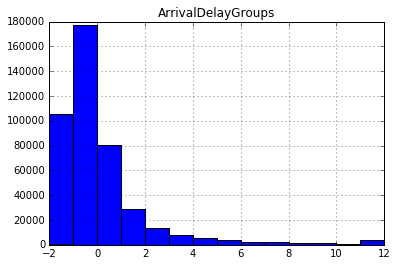

In [23]:
#Histogram of arrival delay groups
%matplotlib inline
OnTimeSample.hist("ArrivalDelayGroups", bins=14)

In [26]:
"""Look at most common airlines"""
OnTimeSample.UniqueCarrier.value_counts()

WN    104154
AA     75580
DL     69711
OO     47619
EV     41970
UA     39761
B6     23018
AS     14205
NK     11047
F9      7099
HA      6279
VX      5384
Name: UniqueCarrier, dtype: int64

In [32]:
cd ..

C:\Users\Will\Jupyter\Data Science Intensive


In [37]:
"""Read in unique carrier names"""
UniqueCarriers = pd.read_csv('L_UNIQUE_CARRIERS.csv')
UniqueCarriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [38]:
"""Rename unique carrier code so it will merge onto main data frame"""
UniqueCarriers.rename(columns={'Code': 'UniqueCarrier', 'Description': 'Carrier Name'}, inplace=True)
UniqueCarriers.head()

,UniqueCarrier,Carrier Name
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [39]:
"""Merge on unique carrier names"""
OnTimeSample = OnTimeSample.merge(UniqueCarriers, on="UniqueCarrier")

In [41]:
"""Check value counts again"""
OnTimeSample["Carrier Name"].value_counts()

Southwest Airlines Co.      104154
American Airlines Inc.       75580
Delta Air Lines Inc.         69711
SkyWest Airlines Inc.        47619
ExpressJet Airlines Inc.     41970
United Air Lines Inc.        39761
JetBlue Airways              23018
Alaska Airlines Inc.         14205
Spirit Air Lines             11047
Frontier Airlines Inc.        7099
Hawaiian Airlines Inc.        6279
Virgin America                5384
Name: Carrier Name, dtype: int64

In [47]:
"""Sort airlines by arrival delay rate in January 2016"""
OnTimeSample.groupby("Carrier Name").mean()["ArrDel15"].sort_values(ascending=False)

Carrier Name
Spirit Air Lines            0.299189
JetBlue Airways             0.276315
Virgin America              0.230931
SkyWest Airlines Inc.       0.204539
American Airlines Inc.      0.171084
ExpressJet Airlines Inc.    0.157610
United Air Lines Inc.       0.145195
Frontier Airlines Inc.      0.139356
Southwest Airlines Co.      0.139172
Delta Air Lines Inc.        0.134510
Alaska Airlines Inc.        0.118079
Hawaiian Airlines Inc.      0.081340
Name: ArrDel15, dtype: float64

In [51]:
"""Find arrival cities with lowest and highest arrival delay rates in January 2016"""
dest_city_rates = OnTimeSample.groupby("DestCityName").mean()["ArrDel15"].sort_values(ascending=False)
dest_city_rates.head(10)

DestCityName
North Bend/Coos Bay, OR           0.400000
Santa Maria, CA                   0.385965
Ponce, PR                         0.328571
Arcata/Eureka, CA                 0.319328
La Crosse, WI                     0.306122
Aguadilla, PR                     0.304878
San Francisco, CA                 0.300306
Newburgh/Poughkeepsie, NY         0.300000
Latrobe, PA                       0.294118
New Bern/Morehead/Beaufort, NC    0.290909
Name: ArrDel15, dtype: float64

In [52]:
dest_city_rates.tail(10)

DestCityName
Aberdeen, SD                    0.048387
Mission/McAllen/Edinburg, TX    0.046632
Fairbanks, AK                   0.046512
Hobbs, NM                       0.042553
Hattiesburg/Laurel, MS          0.040000
Deadhorse, AK                   0.037975
Bethel, AK                      0.037500
Cordova, AK                     0.035088
Petersburg, AK                  0.033333
St. Augustine, FL               0.000000
Name: ArrDel15, dtype: float64

In [53]:
"""Now find departure cities leading to highest and lowest arrival delay rates"""
orig_city_rates = OnTimeSample.groupby("OriginCityName").mean()["ArrDel15"].sort_values(ascending=False)
orig_city_rates.head(10)

OriginCityName
North Bend/Coos Bay, OR      0.470588
Adak Island, AK              0.444444
Muskegon, MI                 0.372881
Arcata/Eureka, CA            0.361345
Atlantic City, NJ            0.360544
Worcester, MA                0.344828
Latrobe, PA                  0.341176
Newburgh/Poughkeepsie, NY    0.338462
Hibbing, MN                  0.337500
Cody, WY                     0.333333
Name: ArrDel15, dtype: float64

In [54]:
orig_city_rates.tail(10)

OriginCityName
Kodiak, AK            0.051282
Cordova, AK           0.050847
Corpus Christi, TX    0.049793
Texarkana, AR         0.048780
Killeen, TX           0.046729
Hilo, HI              0.044715
Wrangell, AK          0.034483
Petersburg, AK        0.033333
Lake Charles, LA      0.027027
St. Augustine, FL     0.000000
Name: ArrDel15, dtype: float64

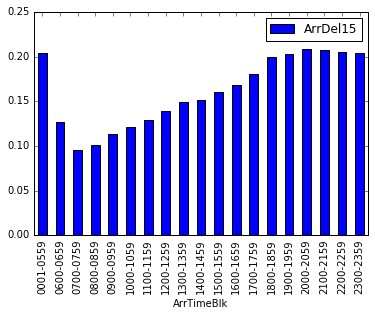

In [56]:
"""Bar graph of arrival delay rates by scheduled arrival time"""
OnTimeSample.groupby("ArrTimeBlk").mean().plot(y='ArrDel15', kind='bar')